In [25]:
"""
Exercise 3 (advanced): Reach the highest summit

The following program starts at a random position and keeps going to the right until Venla can no longer go up. However, perhaps the mountain is a bit rugged which means it's necessary to look a bit further ahead.

Edit the program so that Venla doesn't stop climbing as long as she can go up by moving up to five steps either left or right. If there are multiple choices within five steps that go up, any one of them is good. To check how your climbing algorithm works in action, you can plot the results of your hill climbing using the Plot button. As a reminder, the summit will be marked with a blue triangle.
"""

import math
import random             	# just for generating random mountains

# generate random mountains

w = [.05, random.random()/3, random.random()/3]
h = [1.+math.sin(1+x/.6)*w[0]+math.sin(-.3+x/9.)*w[1]+math.sin(-.2+x/30.)*w[2] for x in range(100)]

def climb(x, h):
    # edit here
    while True:
        looking_to_left = x-5 if x-5 > 0 else 0
        looking_to_right = x+6 if x+6 < len(h) else len(h)
        view = h[looking_to_left:looking_to_right]
        x_maximum_view = looking_to_left+view.index(max(view))
        if x_maximum_view == x:
            return x
        x = x_maximum_view


def climb_solution(x):
    # keep climbing until we've found a summit
    summit = False

    # edit here
    while not summit:
        summit = True
        for x_new in range(max(0, x-5), min(99, x+5)):
            if h[x_new] > h[x]:
                x = x_new         # here is higher, go here
                summit = False    # and keep going
    return x


def new_climb(x, h):
    # edit here
    while True:
        # further west and east views
        west_view = max(0, x-5)
        east_view = min(len(h), x+6)
        # higher location
        higher_viewing_location = west_view + h[west_view:east_view].index(max(h[west_view:east_view]))
        if higher_viewing_location == x:
            return x
        x = higher_viewing_location


def main(h):
    # start at a random place
    x0 = random.randint(1, 98)
    x = new_climb(x0, h)

    return x0, x

x0, x = main(h)

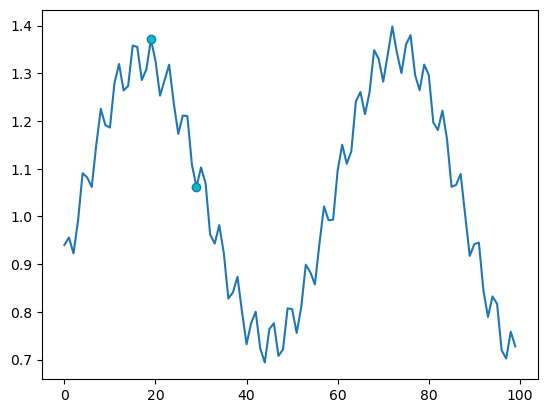

In [26]:
import matplotlib.pyplot as plt
markers_on = [x0, x]
plt.plot(h, marker = 'o', mfc='c', markevery=markers_on)